In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
train = pd.read_csv('train5.csv')

In [3]:
train.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [4]:
train.tail()

,row_id,time,x,y,direction,congestion
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17
848834,848834,1991-09-30 11:40:00,2,3,WB,24


In [5]:
train.nunique()

row_id        848835
time           13059
x                  3
y                  4
direction          8
congestion       101
dtype: int64

In [6]:
train.isnull().sum()

row_id        0
time          0
x             0
y             0
direction     0
congestion    0
dtype: int64

In [7]:
train.shape

(848835, 6)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB


In [9]:
train['date'] = train['time'].str[8:10]

In [10]:
train.head()

,row_id,time,x,y,direction,congestion,date
0,0,1991-04-01 00:00:00,0,0,EB,70,01
1,1,1991-04-01 00:00:00,0,0,NB,49,01
2,2,1991-04-01 00:00:00,0,0,SB,24,01
3,3,1991-04-01 00:00:00,0,1,EB,18,01
4,4,1991-04-01 00:00:00,0,1,NB,60,01


In [11]:
train['time'] = pd.to_datetime(train.time)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   row_id      848835 non-null  int64         
 1   time        848835 non-null  datetime64[ns]
 2   x           848835 non-null  int64         
 3   y           848835 non-null  int64         
 4   direction   848835 non-null  object        
 5   congestion  848835 non-null  int64         
 6   date        848835 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 45.3+ MB


In [12]:
train['Day'] = train['time'].dt.weekday
train['hour'] = train['time'].dt.hour
train['week'] = train['time'].dt.isocalendar().week
train['year'] = train['time'].dt.year
train['month'] = train['time'].dt.month

train.head()

,row_id,time,x,y,direction,congestion,date,Day,hour,week,year,month
0,0,1991-04-01,0,0,EB,70,01,0,0,14,1991,4
1,1,1991-04-01,0,0,NB,49,01,0,0,14,1991,4
2,2,1991-04-01,0,0,SB,24,01,0,0,14,1991,4
3,3,1991-04-01,0,1,EB,18,01,0,0,14,1991,4
4,4,1991-04-01,0,1,NB,60,01,0,0,14,1991,4


In [13]:
Train = train

In [14]:
train = train.drop(['time'], axis = 1)
train = train.drop(['row_id'], axis = 1)
train = train.drop(['year'], axis = 1)
train.head()

,x,y,direction,congestion,date,Day,hour,week,month
0,0,0,EB,70,01,0,0,14,4
1,0,0,NB,49,01,0,0,14,4
2,0,0,SB,24,01,0,0,14,4
3,0,1,EB,18,01,0,0,14,4
4,0,1,NB,60,01,0,0,14,4


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   x           848835 non-null  int64 
 1   y           848835 non-null  int64 
 2   direction   848835 non-null  object
 3   congestion  848835 non-null  int64 
 4   date        848835 non-null  object
 5   Day         848835 non-null  int64 
 6   hour        848835 non-null  int64 
 7   week        848835 non-null  UInt32
 8   month       848835 non-null  int64 
dtypes: UInt32(1), int64(6), object(2)
memory usage: 55.9+ MB


In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['Direction'] = label.fit_transform(train['direction'])
train['Date'] = label.fit_transform(train['date'])

train

,x,y,direction,congestion,date,Day,hour,week,month,Direction,Date
0,0,0,EB,70,01,0,0,14,4,0,0
1,0,0,NB,49,01,0,0,14,4,1,0
2,0,0,SB,24,01,0,0,14,4,4,0
3,0,1,EB,18,01,0,0,14,4,0,0
4,0,1,NB,60,01,0,0,14,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
848830,2,3,NB,54,30,0,11,40,9,1,29
848831,2,3,NE,28,30,0,11,40,9,2,29
848832,2,3,SB,68,30,0,11,40,9,4,29
848833,2,3,SW,17,30,0,11,40,9,6,29


In [17]:
train = train.drop(['direction'], axis = 1)
train = train.drop(['date'], axis = 1)
train.head()

,x,y,congestion,Day,hour,week,month,Direction,Date
0,0,0,70,0,0,14,4,0,0
1,0,0,49,0,0,14,4,1,0
2,0,0,24,0,0,14,4,4,0
3,0,1,18,0,0,14,4,0,0
4,0,1,60,0,0,14,4,1,0


In [18]:
train.nunique()

x               3
y               4
congestion    101
Day             7
hour           24
week           27
month           6
Direction       8
Date           31
dtype: int64

<AxesSubplot:xlabel='x', ylabel='count'>

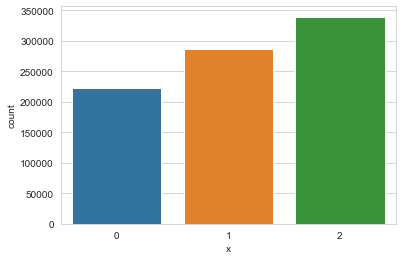

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='x',data=train)

<AxesSubplot:xlabel='y', ylabel='count'>

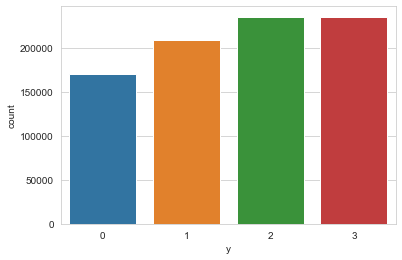

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=train)

<AxesSubplot:xlabel='Day', ylabel='count'>

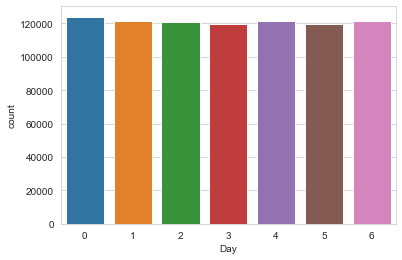

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Day',data=train)

In [22]:
corelation = train.corr() 

<AxesSubplot:>

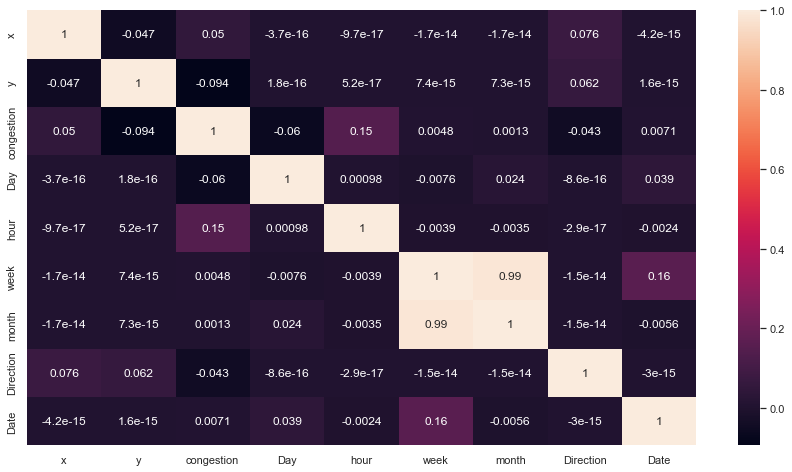

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'congestion'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'week'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Direction'}>,
        <AxesSubplot:title={'center':'Date'}>]], dtype=object)

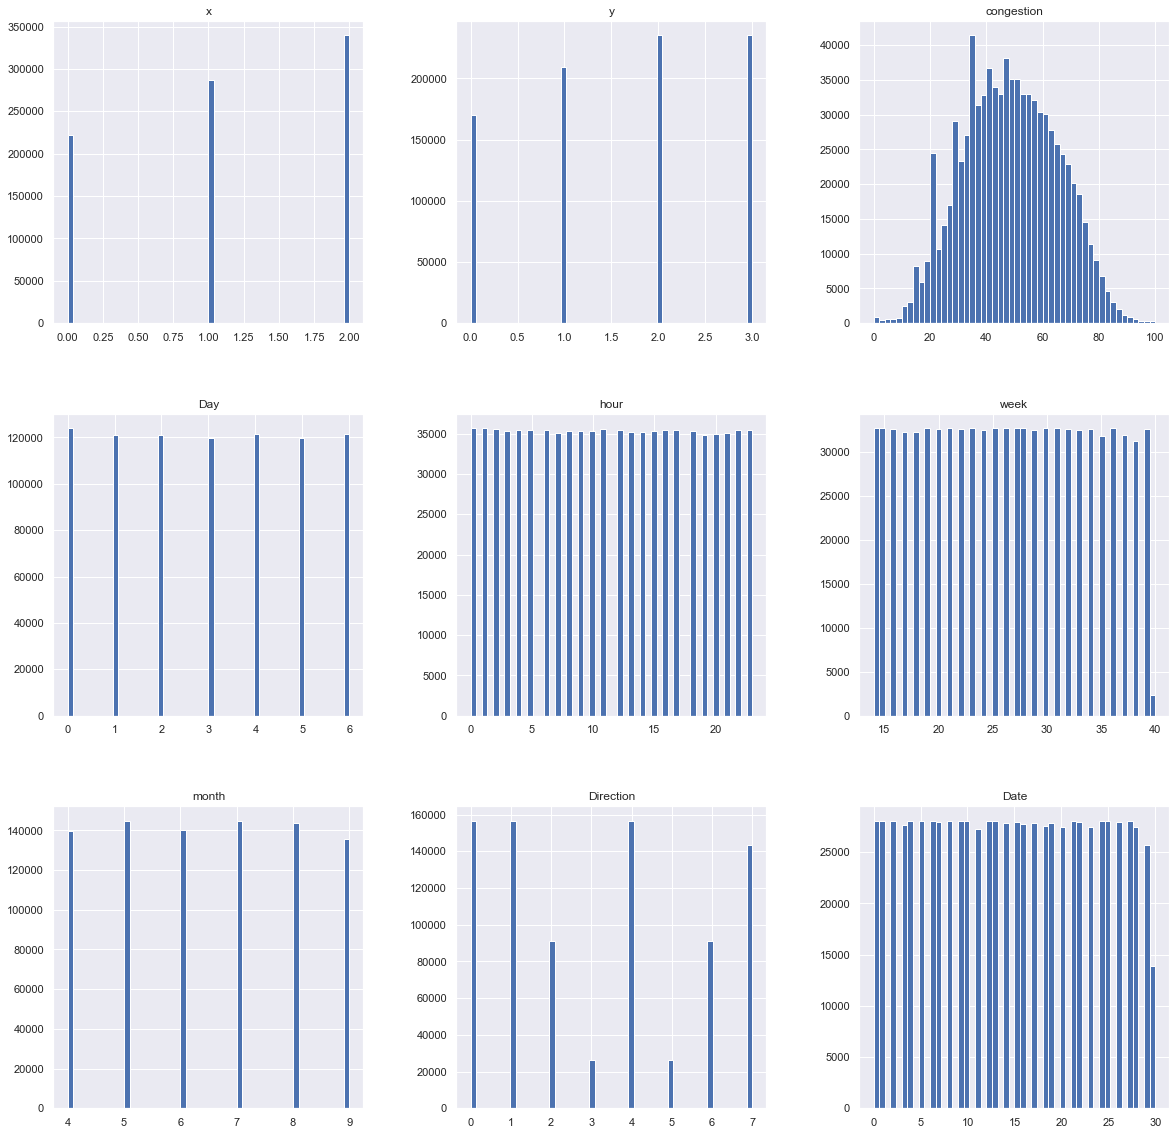

In [24]:
sns.set(rc = {'figure.figsize':(20,20)})
train.hist(bins = 50)

<AxesSubplot:xlabel='hour', ylabel='congestion'>

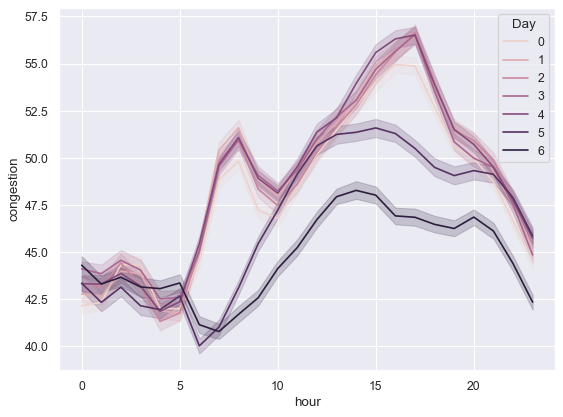

In [25]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=train, x='hour', y='congestion', hue='Day')

<AxesSubplot:xlabel='x', ylabel='congestion'>

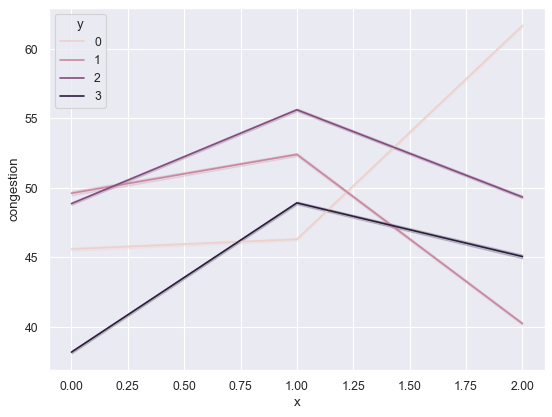

In [26]:
import seaborn as sns
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=train, x='x', y='congestion', hue='y')

<AxesSubplot:xlabel='Day', ylabel='congestion'>

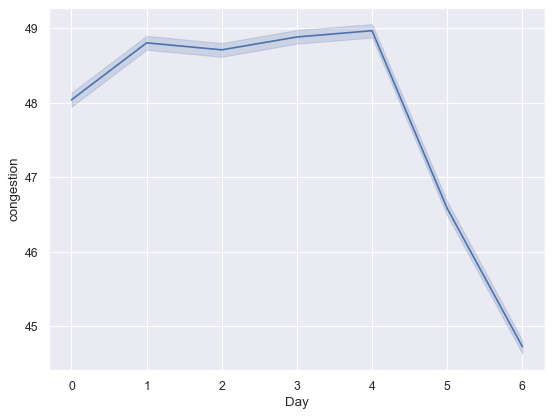

In [27]:
import seaborn as sns
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=train, x='Day', y='congestion')

<AxesSubplot:xlabel='Date', ylabel='congestion'>

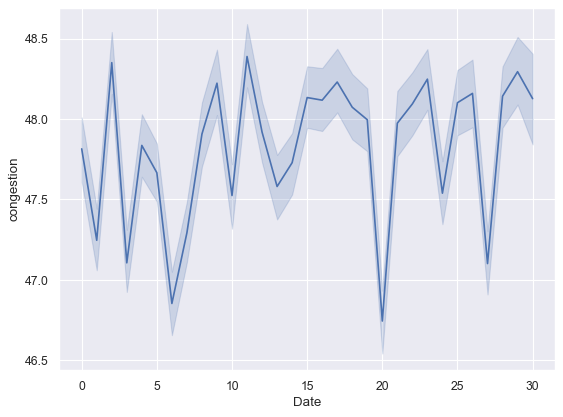

In [28]:
import seaborn as sns
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=train, x='Date', y='congestion')

In [30]:
X = train.drop(['congestion'], axis = 1)
y = train['congestion']

## Test train split

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

## Random forest 

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [42]:
rf_prediction = rf_regressor.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,rf_prediction))

87.29274938604551


In [52]:
print(rf_regressor.score(X_test,y_test))

0.691844931993459


## Linear regression

In [47]:
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
lr_prediction = lr_regressor.predict(X_test)

In [49]:
print(mean_squared_error(y_test,lr_prediction))

272.70531887545593


In [53]:
print(lr_regressor.score(X_test,y_test))

0.03731378980663247


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [55]:
dt_prediction = dt_regressor.predict(X_test)

In [56]:
print(mean_squared_error(y_test,dt_prediction))

100.44318389321835


In [57]:
print(dt_regressor.score(X_test,y_test))

0.6454221412304817


## SVM

In [59]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', max_iter = 900)
regressor.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(max_iter=900)

In [61]:
prediction = regressor.predict(X_test)

In [62]:
print(mean_squared_error(y_test,prediction))

285.1935040525087


In [63]:
print(regressor.score(X_test,y_test))

-0.006771172341760723
